# Шаг 7. Машинное обучение

Прогнозирование цены недвижимости: задача регрессии, в которой модель обучается на основе характеристик квартиры для предсказания ее цены. И владелец, планирующий выставить своё жильё для аренды сможет определить выгодные условия, сравнив своё жильё с похожими вариантами.




1) Подключение библиотек.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

2) Разделение данных на признаки (X) и целевую переменную (y).

In [75]:
X = df.drop(columns=['Price'])
y = df['Price']

3) Разделение данных на обучающую и тестовую выборки в соотношении 80/20.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4) Удаление не численных столбцов (так как из-за этого возникают ошибки).

In [77]:
X_train = X_train.drop(columns=['Metro', 'Date', 'Day_of_Week'])
X_test = X_test.drop(columns=['Metro', 'Date', 'Day_of_Week'])

5) Обучение модели линейной регрессии

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

6) Предсказания на тестовом наборе данных.

In [79]:
y_pred = model.predict(X_test)

7) Оценка качества модели.

In [82]:
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Средняя квадратичная ошибка на обучающем наборе: {train_mse}")

test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Средняя квадратичная ошибка на тестовом наборе: {test_mse}")

Средняя квадратичная ошибка на обучающем наборе: 699546674.2494037
Средняя квадратичная ошибка на тестовом наборе: 647819395.8916131


8) Построение графика фактических и предсказанных значений.

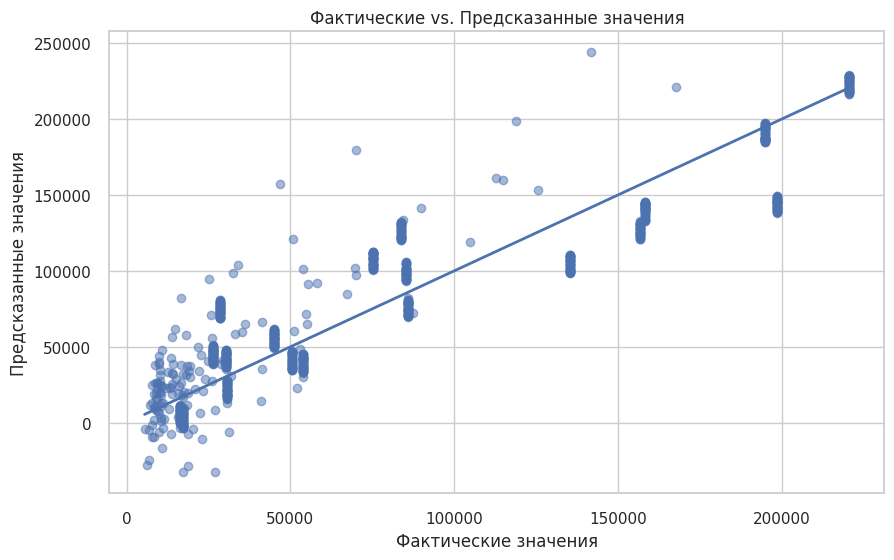

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs. Предсказанные значения')
plt.show()

Вывод: значения средняя квадратичной ошибки на обоих наборах данных получились крайне высокими, что может указывать на то, что модель не очень хорошо обобщает данные и склонна к переобучению или недообучению. Однако, в графическом представлении модель показала себя достойно, явно видна тенденция стремления к диагональной линии от минимального до максимального значения фактических цен на недвижимость.



9) Пример расчёта стоимости.

In [88]:
# ID, Metro_Time, Rooms, Area, Floor, Total_Floor, Floor_Ratio, Day_of_Week_Num
new_data_1 = [[6000, 2, 2, 66, 18, 18, 1, 4]]

predicted_price = model.predict(new_data_1)

print(f"Предсказанная стоимость аренды: {round(predicted_price[0])} рублей в месяц")

Предсказанная стоимость аренды: 86176 рублей в месяц


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10) Пример расчёта стоимости с рандомными данными.

In [91]:
import random

new_id = random.randint(6000, 9999)
new_metro_time = random.randint(1, 30)
new_rooms = random.randint(1, 4)
new_area = random.randint(30, 200)
new_floor = random.randint(1, 5)
new_total_floor = random.randint(5, 25)
new_floor_ratio = new_floor/new_total_floor
new_day_of_week_num = random.randint(0, 6)

new_data = [[new_id, new_metro_time, new_rooms, new_area, new_floor, new_total_floor, new_floor_ratio, new_day_of_week_num]]
predicted_price = model.predict(new_data)
print(f"Предсказанная стоимость аренды: {round(predicted_price[0])} рублей в месяц")
print(new_data)

Предсказанная стоимость аренды: 316163 рублей в месяц
[[9577, 27, 1, 156, 1, 20, 0.05, 5]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Планы по развитию проекта**

Наша модель не точна, так как отсутствует крайне важный фактор - станция метро, а в Москве это один из главных ценообразующих факторов, который мы планируем включить в нашу модель в будущем. На данный момент это оказалось трудно реализовать из-за отсутствия структурированных данных в сети Интернет и большого количества станций Московского метрополитена (более 260). Однако у нас уже есть идея как мы будем оценивать станцию метро: мы разделим все станции на 4 класса, соответственно, чем выше класс, тем "центральнее" расположение, тем дороже стоимость аренды.

*    1 класс - станции внутри Кольцевой линии (линия 5)

*    2 класс - станции внутри Большой кольцевой линии (БКЛ, линия 11)

*    3 класс - станции внутри Московского центрального кольца (МЦК, линия 14)

*    4 класс - все остальные "заМЦКадыши" метрополитена